In [131]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries to ease the code
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [132]:
# Defining the function to cauculate the Euclidean Distance
def euclidean_distance(train_attr1, train_attr2, test_attr1, test_attr2):
    distance = ((train_attr1 - test_attr1)**2 + (train_attr2 - test_attr2)**2)**0.5
    return distance
    

In [133]:
# Defining the function to cauculate the Euclidean Distance
def manhattan_distance(train_attr1, train_attr2, test_attr1, test_attr2):
    distance = abs(train_attr1 - test_attr1) + abs(train_attr2 - test_attr2)
    return distance

In [134]:
# # Defining the function to cauculate the K-Nearest Neighboors
def knn(X_train, X_test, y_train, k_neighboors, distance_type, y_pred):
    
    for i in range(0,len(X_test)):
        distances = []
        for j in range(0,len(X_train)):
            for k in range(0, len(X_test[0])-1):
                # Calculate the chosen metric for distance
                if distance_type == 'M' or distance_type == 'm':
                    distance = manhattan_distance(X_train[j][k], X_train[j][k+1], X_test[i][k], X_test[i][k+1])
                    distances.append(distance)
                else:
                    distance = euclidean_distance(X_train[j][k], X_train[j][k+1], X_test[i][k], X_test[i][k+1])
                    distances.append(distance)
                    
        neighboors = []
        
        # Get the distances with the classification of the train set, to verify the right classification for the data
        for l in range(0, len(distances)):
            neighboors.append([distances[l], y_train[l]]) 
        
        # Sort the distances to get the first k ones
        neighboors.sort(key = lambda x: x[0])
        neighboors = pd.DataFrame(neighboors)
        
        # Verify, among the first k distances, which classification is the most popular
        classification = mode(neighboors[:k_neighboors][1])
        
        # Get this classification into the predictions list
        y_pred.append(classification)

In [135]:
# Fuction to calculate the score of the algorithm, its success rate
def hits_matchs(y_pred, y_test):
    hits = 0
    for i in range(0,len(y_pred)):
        if y_pred[i] == y_test[i]:
            hits = hits + 1
            
    match = hits/len(y_pred)
    return match

In [136]:
# Generating a sample of data to test the algorithms
np.random.seed(42)

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

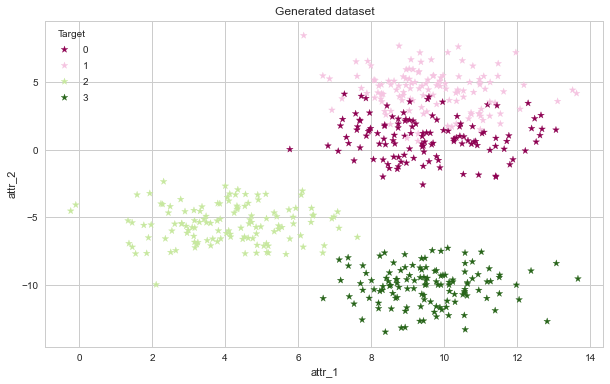

In [178]:
# Visualizing the data distribution
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=df["attr_1"],
                     y=df["attr_2"],
                     c=df["target"],
                     cmap='PiYG',
                     marker='*');

# Customize the plot
ax.set(title="Generated dataset",
       xlabel = "attr_1",
       ylabel = "attr_2");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

In [139]:
# Get the keyboard input for the number of neighboors and the type of distance that will be used
k = int(input('How many neighboors: '))
d = input('Distance? Manhattan (M) or Euclidean (E)? ')
y_pred = []
knn(X_train, X_test, y_train, k, d, y_pred)
match = hits_matchs(y_pred,y_test)

How many neighboors: 5
Distance? Manhattan (M) or Euclidean (E)? m

Accuracy with k = 5: 0.9133333333333333


In [182]:
# Confronting the results with the built-in method
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Using the same parameters
if d == 'M' or d == 'm': p = 1
else: p = 2

knn = KNeighborsClassifier(n_neighbors = k, p=p)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [183]:
if d == 'M' or d == 'm':
        dist = 'Manhatann'
else:
    dist = 'Euclidean'
    
print(f'Number of neighboors: {k}\nDistance Metric: {dist}\n\nAccuracy: {match}\nAccuracy (built-in one): {accuracy_score(y_test, y_pred)*100}')

Number of neighboors: 5
Distance Metric: Manhatann

Accuracy: 0.9133333333333333
Accuracy (built-in one): 91.33333333333333
